# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=None
from pprint import pprint
import seaborn as sns
from sklearn.metrics import roc_auc_score,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [2]:
# Your code here! :)
german_df=pd.read_csv('GermanCredit.csv')
german_df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


# Model with Default Parameters

In [9]:
german_df.isnull().sum()[german_df.isnull().sum()!=0]#No missing values
list(german_df.columns)
german_df.dtypes.value_counts()
german_df.Class.value_counts()
y=german_df.Class
x=german_df.drop('Class',axis=1)
print(x.shape,y.shape)
y=y.map({'Good':0,'Bad':1})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
clf=DecisionTreeClassifier()
# clf.fit(x_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score
clf.fit(x_train,y_train)
print('Train Classification Report: ')
print(classification_report(y_train,clf.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,clf.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,clf.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,clf.predict(x_test)))

(1000, 61) (1000,)
Train Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       491
           1       1.00      1.00      1.00       209

   micro avg       1.00      1.00      1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Train confusion Matrix
Predicted    0    1
Actual             
0          491    0
1            0  209
Test Confusion Matrix
Predicted    0   1
Actual            
0          159  50
1           42  49
Test Classification Report
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       209
           1       0.49      0.54      0.52        91

   micro avg       0.69      0.69      0.69       300
   macro avg       0.64      0.65      0.65       300
weighted avg       0.70      0.69      0.70       300



# Finetuning the model parameters:

# Max Depth :

(1000, 61) (1000,)


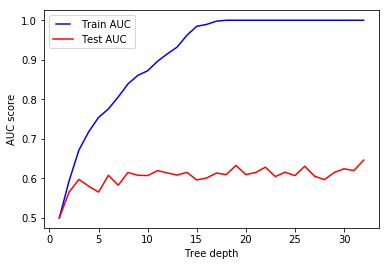

31

In [4]:

from sklearn.metrics import roc_auc_score,auc,roc_curve
y=german_df.Class
x=german_df.drop('Class',axis=1)
print(x.shape,y.shape)
y=y.map({'Good':0,'Bad':1})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
np.argmax(test_results)#IDeal max depth=28




# Min_splits finetuning

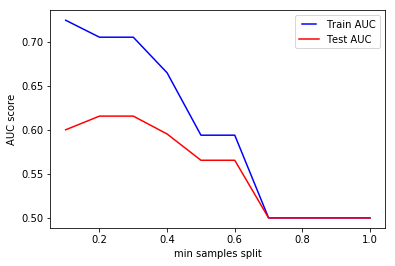

10
[0.59997896840002107, 0.61548977338451027, 0.61548977338451027, 0.59519427940480574, 0.56540827593459164, 0.56540827593459164, 0.5, 0.5, 0.5, 0.5]


0.20000000000000001

In [16]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()
print(len(test_results))
print(test_results)
min_samples_splits[np.argmax(test_results)]#0.20000001

# Min Samples Leafs

In [21]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()
min_samples_leafs[np.argmax(test_results)]
print(test_results,min_samples_leafs)#0.2 optimal

[0.59519427940480574, 0.63773069036226937, 0.5, 0.5, 0.5] [ 0.1  0.2  0.3  0.4  0.5]


# Max Features

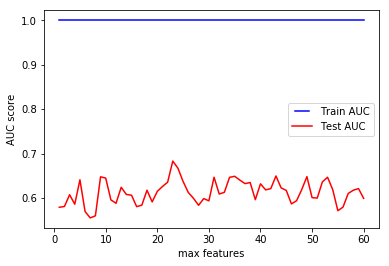

23 0.683106367317


In [30]:
max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()
print(max_features[np.argmax(test_results)],test_results[np.argmax(test_results)])#23

# Building Decision Tree Classifier with Above fine tuned  values

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       491
           1       0.53      0.47      0.50       209

   micro avg       0.72      0.72      0.72       700
   macro avg       0.66      0.65      0.65       700
weighted avg       0.71      0.72      0.71       700

Train confusion Matrix
Predicted    0   1
Actual            
0          404  87
1          110  99
Test Confusion Matrix
Predicted    0   1
Actual            
0          177  32
1           52  39
Test Classification Report
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       209
           1       0.55      0.43      0.48        91

   micro avg       0.72      0.72      0.72       300
   macro avg       0.66      0.64      0.64       300
weighted avg       0.71      0.72      0.71       300

0.4841628959276018 0.5119617224880383


0.6398912482093958

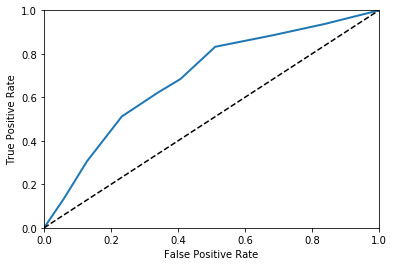

In [4]:
clf=DecisionTreeClassifier(max_depth=28,min_samples_split=0.20000000000000001,min_samples_leaf=0.2)
clf.fit(x_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,precision_recall_curve,roc_auc_score
clf.fit(x_train,y_train)
print('Train Classification Report: ')
print(classification_report(y_train,clf.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,clf.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,clf.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,clf.predict(x_test)))

clf.predict_proba(x_train)
from sklearn.model_selection import cross_val_score,cross_val_predict
y_scores=cross_val_predict(clf,x_train,y_train,cv=3,method='predict_proba')
y_scores_tree=y_scores[:,1]
precision,recall,thresh=precision_recall_curve(y_train,y_scores_tree)
# plt.plot(thresh,precision[:-1],'b--',label='Precision')
# plt.plot(thresh,recall[:-1],'g-',label='Recall')
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train,y_scores_tree)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
y_scores_tree=y_scores_tree>0.47
print(precision_score(y_train,y_scores_tree),recall_score(y_train,y_scores_tree))
roc_auc_score(y_train,y_scores_tree)

# Combined Finetuning No need to evaluate this block

In [78]:
# clf=DecisionTreeClassifier(random_state=45)
# clf.fit(x_train,y_train)
# from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score
# from sklearn.model_selection import GridSearchCV
# # params={'max_depth':[4,16,32,64,128]}
# params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5,6]}
# # params={'max_depth':[5,6,7,8,9,10,11,13],'min_samples_leaf':[1,2,3,4,5,6,7],'min_samples_split':[2,3,4,5,6,7,8,9],
# #        'max_leaf_nodes':[4,5,6,7,8]}
# clf=GridSearchCV(clf,param_grid=params,verbose=1,cv=3)
# clf.fit(x_train,y_train)
# print(clf.best_params_)
# print(clf.best_score_)

# print('Train Classification Report: ')
# print(classification_report(y_train,clf.predict(x_train)))
# print('Train confusion Matrix')
# print(pd.crosstab(y_train,clf.predict(x_train),rownames=['Actual'],colnames=['Predicted']))

# from sklearn.metrics import accuracy_score
# print('Train accuracy score',accuracy_score(y_train,clf.predict(x_train)))
# print('Test accuracy score',accuracy_score(y_test,clf.predict(x_test)))

# print('Test Confusion Matrix')
# print(pd.crosstab(y_test,clf.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
# print('Test Classification Report')
# print(classification_report(y_test,clf.predict(x_test)))
# from sklearn.model_selection import cross_val_score,cross_val_predict
# print('Cross validation scores {}'.format(cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')))
# from sklearn.base import BaseEstimator
# class NeverGoodClassifier(BaseEstimator):
#     def fit(self,X,y=None):
#         pass
#     def predict(self,X):
#         return np.zeros((len(X),1),dtype=bool)
# nevergoodclf=NeverGoodClassifier()
# print('Dumb classifier cross_val_score:{}'.format(cross_val_score(nevergoodclf,x_train,y_train,cv=10,scoring='accuracy')))
# train_pred=cross_val_predict(clf,x_train,y_train)
# print(pd.crosstab(y_train,train_pred,rownames=['Actual'],colnames=['Predicted']))
# y_scores=cross_val_predict(clf,x_train,y_train,cv=3)
# from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score
# print('Train Classification Report: ')
# print(classification_report(y_train,clf.predict(x_train)))
# print('Train confusion Matrix')
# print(pd.crosstab(y_train,clf.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
# # print(y_train.value_counts())
# print('precision score {}'.format(precision_score(y_train,clf.predict(x_train))))
# print('Recall Score {}'.format(recall_score(y_train,clf.predict(x_train))))


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [79]:
! pip install dtreeviz

  Running setup.py bdist_wheel for dtreeviz ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/39/a3/1d/6b650e1dc7dee16d8385e11f4d6fff1d37e12f697d1dee5260
Successfully built dtreeviz
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
mxnet-cu80 1.2.0 has requirement graphviz<0.9.0,>=0.8.1, but you'll have graphviz 0.13 which is incompatible.
  Found existing installation: graphviz 0.8.3
    Uninstalling graphviz-0.8.3:
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/anaconda/lib/python3.6/site-packages/graphviz-0.8.3.dist-info/INSTALLER'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [10]:
# Your code here! :)
from dtreeviz.trees import *
viz=dtreeviz(clf,x_train,y_train,target_name='class',feature_names=x_train.columns,
        class_names=list(set(german_df.Class)))
viz.view()

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

# Base Model with Default Parameters

In [38]:
# Your code here! :)
clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=256)
clf.fit(x_train,y_train)
print('Train Classification Report: ')
print(classification_report(y_train,clf.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,clf.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,clf.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,clf.predict(x_test)))


Train Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       491
           1       1.00      1.00      1.00       209

   micro avg       1.00      1.00      1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Train confusion Matrix
Predicted    0    1
Actual             
0          491    0
1            0  209
Test Confusion Matrix
Predicted    0   1
Actual            
0          195  14
1           58  33
Test Classification Report
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       209
           1       0.70      0.36      0.48        91

   micro avg       0.76      0.76      0.76       300
   macro avg       0.74      0.65      0.66       300
weighted avg       0.75      0.76      0.73       300



# Randomized Search CV for hyper parameter tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
clf=RandomForestClassifier()
clf=RandomizedSearchCV(clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42)
clf.fit(x_train,y_train)
clf.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.6s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.6s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.7s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   3.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.4s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, mi

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.6s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.6s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   3.6s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   2.9s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, 

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   4.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   4.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   4.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.3min finished


{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

# Using Results from Random Search with Grid Search

In [419]:
clf_grid=RandomForestClassifier(n_estimators=1200,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=70)

clf_grid.fit(x_train,y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,clf_grid.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6017403648982597

In [427]:
result_df
result_df=result_df.rename(columns={'f1-score':'f1-score_testset','FP':'test_set_FP','FN':'test_set_FN','AUC':'test_set_AUC'})
result_df.to_pickle('Ensemble_metrics.pkl')

In [8]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True],
    'max_depth': [60,70,80, 90, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [2,3,4,5],
    'n_estimators': [1000, 1200, 1300, 11000]
}
clf_grid=RandomForestClassifier()
clf_grid=GridSearchCV(clf_grid,param_grid=param_grid,verbose=1,cv=3,n_jobs=-1)
clf_grid.fit(x_train,y_train)
clf_grid.best_params_
print('Train Classification Report: ')
print(classification_report(y_train,clf_grid.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,clf_grid.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,clf_grid.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,clf_grid.predict(x_test)))

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 17.4min finished


Train Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       491
           1       1.00      0.85      0.92       209

   micro avg       0.96      0.96      0.96       700
   macro avg       0.97      0.93      0.94       700
weighted avg       0.96      0.96      0.95       700

Train confusion Matrix
Predicted    0    1
Actual             
0          491    0
1           31  178
Test Confusion Matrix
Predicted    0   1
Actual            
0          196  13
1           63  28
Test Classification Report
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       209
           1       0.68      0.31      0.42        91

   micro avg       0.75      0.75      0.75       300
   macro avg       0.72      0.62      0.63       300
weighted avg       0.73      0.75      0.71       300



In [425]:
result_df

,Default Params test_score,test_scores,f1-score,FP,FN,AUC
RF,0.750000,0.713333,"[0.84,0.42]",13.0,63.0,0.601700
XGB,0.770000,0.770000,"[0.83,0.38]",12.0,67.0,0.603160
CatBoost,0.786667,0.783333,"[0.84,0.46]",15.0,59.0,0.686287
LightGBM,0.000000,0.000000,0,0.0,0.0,0.000000


# Gradient Boosting

In [83]:
clf_grid.best_params_
clf=GradientBoostingClassifier(n_estimators=1200,min_samples_leaf=2,min_samples_split=3,max_depth=80)
clf.fit(x_train,y_train)
pd.DataFrame(np.c_[x_train.columns,clf.feature_importances_],columns=['Columns','Feature_imp']).sort_values(by='Feature_imp',ascending=False)

,Columns,Feature_imp
1,Amount,0.146488
0,Duration,0.128448
4,Age,0.10874
12,CheckingAccountStatus.none,0.0917332
29,SavingsAccountBonds.lt.100,0.0402995
3,ResidenceDuration,0.0346003
17,CreditHistory.Critical,0.0312051
18,Purpose.NewCar,0.0261567
15,CreditHistory.PaidDuly,0.0230626
2,InstallmentRatePercentage,0.0230107


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

(-1, 61)

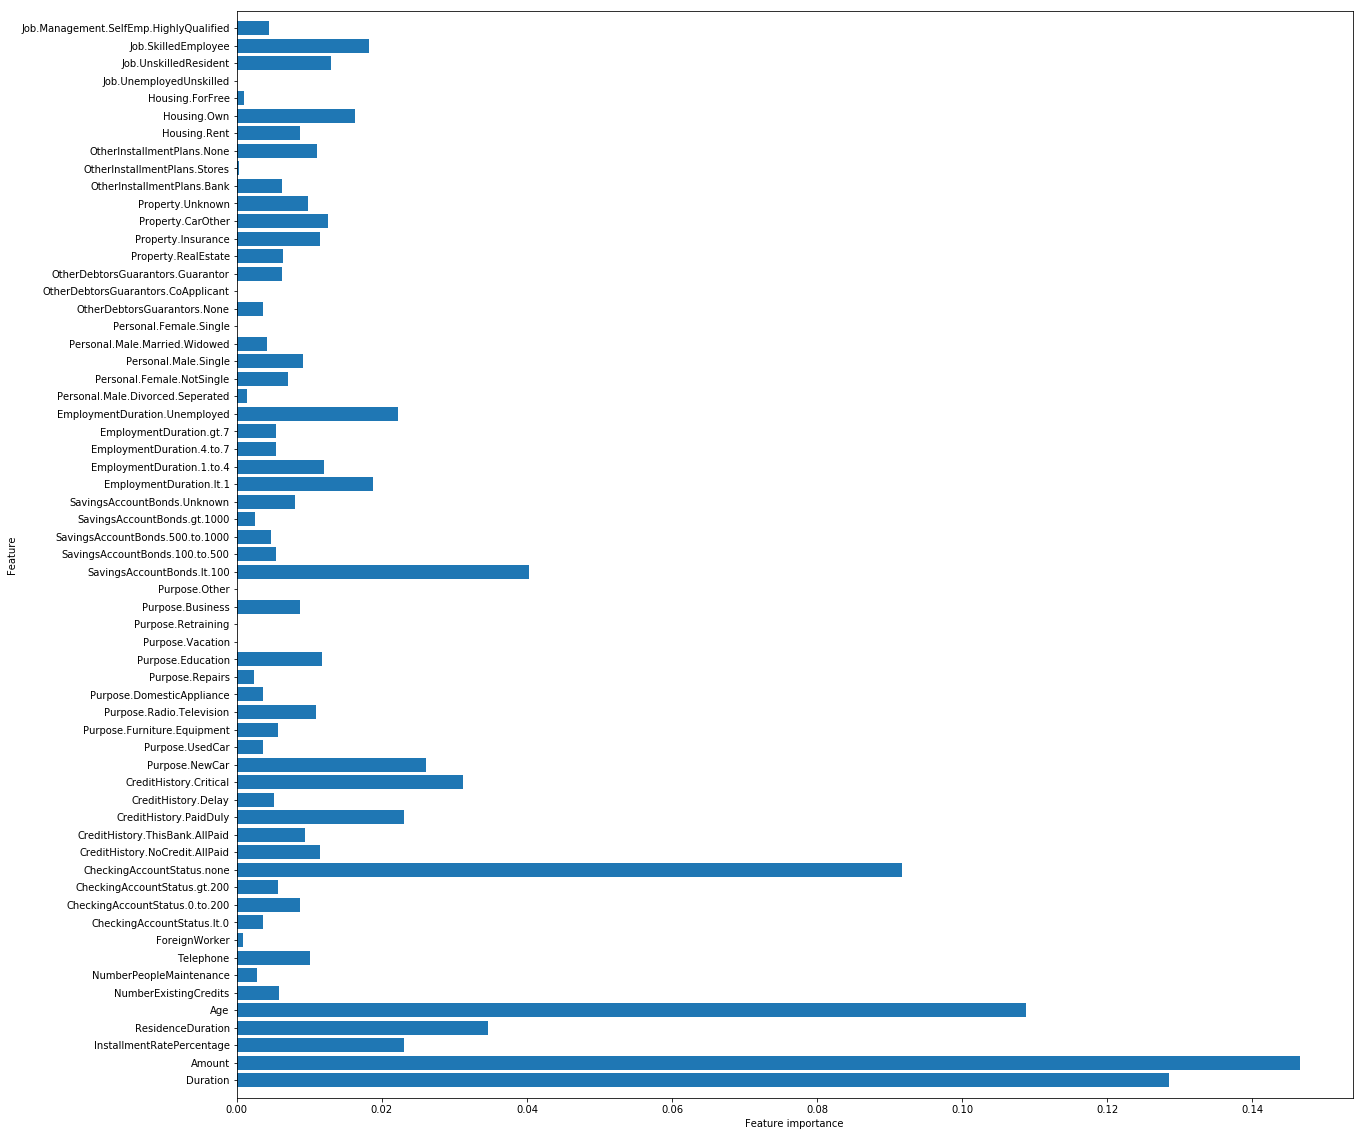

In [84]:
# Your code here
plt.figure(figsize=(20,20))
n_features = x_train.shape[1]
plt.barh(range(n_features), clf.feature_importances_, align='center')
german_features=[x for i,x in enumerate(x_train.columns) if i!=x_train.shape[1]]
plt.yticks(np.arange(n_features), german_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [68]:
! pip install pdpbox

  Stored in directory: C:\Users\Dell\AppData\Local\pip\Cache\wheels\7d\08\51\63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

(<Figure size 432x288 with 3 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1bcf3446be0>])

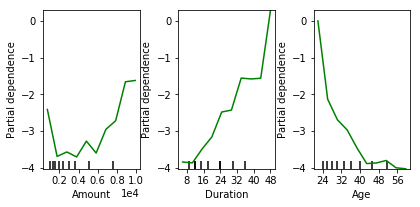

In [90]:
# Your code here!
from sklearn.ensemble.partial_dependence import plot_partial_dependence,partial_dependence
plot_partial_dependence(clf,features=[1,0,4],X=x_train,
                        feature_names=list(x_train.columns),grid_resolution=10)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

# XGBooost 

In [23]:
from xgboost import XGBClassifier
clf_xgb=XGBClassifier()
clf_xgb.fit(x_train,y_train)
print('xgboost Default params train: {}'.format(clf_xgb.score(x_train,y_train)))
print('xgboost Default params test: {}'.format(clf_xgb.score(x_test,y_test)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Default params train: 0.9814285714285714
Random Forest Default params test: 0.7133333333333334
xgboost Default params train: 0.8914285714285715
xgboost Default params test: 0.77


# Fine tuning of XGBOOST

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [2,3,4,5]
# max_depth.append(None)
# Minimum number of samples required to split a node
# Minimum number of samples required at each leaf nodmin_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
learning_rate=[0.001,0.01,0.1,1,10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate':learning_rate,
               'max_depth': max_depth,
              'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]}
pprint(random_grid)
clf=XGBClassifier( objective='binary:logistic',
                    silent=True, nthread=1)
clf_rr=RandomizedSearchCV(clf,param_distributions=random_grid,n_iter=100, scoring='roc_auc', n_jobs=4, cv=3, verbose=3, random_state=1001)
clf_rr.fit(x_train,y_train)
clf_rr.best_params_

{'colsample_bytree': [0.6, 0.8, 1.0],
 'gamma': [0.5, 1, 1.5, 2, 5],
 'learning_rate': [0.001, 0.01, 0.1, 1, 10],
 'max_depth': [2, 3, 4, 5],
 'min_child_weight': [1, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'subsample': [0.6, 0.8, 1.0]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   35.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  1.6min finished


{'subsample': 0.8,
 'n_estimators': 1600,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.001,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [414]:
clf_grid=XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=1,subsample=0.8,max_depth= 3,colsample_bytree= 1.0,n_estimators=1000,
                      min_child_weight= 1,learning_rate= 0.001)
# clf_grid=GridSearchCV(clf_grid,param_grid=param_grid,verbose=1,cv=3,n_jobs=-1)
clf_grid.fit(x_train,y_train)

# print(clf_grid.best_params_)
print('Train Classification Report: ')
print(classification_report(y_train,clf_grid.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,clf_grid.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,clf_grid.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,clf_grid.predict(x_test)))

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       491
           1       0.86      0.40      0.55       209

   micro avg       0.80      0.80      0.80       700
   macro avg       0.82      0.69      0.71       700
weighted avg       0.81      0.80      0.78       700

Train confusion Matrix
Predicted    0   1
Actual            
0          477  14
1          125  84
Test Confusion Matrix
Predicted    0   1
Actual            
0          197  12
1           67  24
Test Classification Report
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       209
           1       0.67      0.26      0.38        91

   micro avg       0.74      0.74      0.74       300
   macro avg       0.71      0.60      0.61       300
weighted avg       0.72      0.74      0.69       300



In [77]:
result_df=pd.DataFrame(data=np.zeros((4,6)),columns=['Default Params test_score','test_scores','f1-score','FP','FN','AUC'],index=['RF','XGB','CatBoost','LightGBM'])
result_df.head()

,Default Params test_score,test_scores,f1-score,FP,FN,AUC
RF,0.750000,0.713333,0.0,0.0,0.0,0.0
XGB,0.770000,0.770000,0.0,0.0,0.0,0.0
CatBoost,0.786667,0.000000,0.0,0.0,0.0,0.0
LightGBM,0.000000,0.000000,0.0,0.0,0.0,0.0


In [60]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
result_df.loc['RF','Default Params test_score']=clf.score(x_test,y_test)
clf=XGBClassifier()
clf.fit(x_train,y_train)
result_df.loc['XGB','Default Params test_score']=clf.score(x_test,y_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# CatBoost Classifier

In [64]:
from catboost import CatBoostClassifier
clf_cat=CatBoostClassifier()
clf_cat.fit(x_train,y_train)
clf_cat.score(x_test,y_test)

Learning rate set to 0.015146
0:	learn: 0.6883560	total: 52ms	remaining: 52s
1:	learn: 0.6822878	total: 108ms	remaining: 54s
2:	learn: 0.6768323	total: 162ms	remaining: 53.8s
3:	learn: 0.6707326	total: 216ms	remaining: 53.9s
4:	learn: 0.6653640	total: 268ms	remaining: 53.4s
5:	learn: 0.6601733	total: 327ms	remaining: 54.2s
6:	learn: 0.6576700	total: 355ms	remaining: 50.3s
7:	learn: 0.6535978	total: 392ms	remaining: 48.6s
8:	learn: 0.6488091	total: 454ms	remaining: 50s
9:	learn: 0.6447864	total: 503ms	remaining: 49.8s
10:	learn: 0.6407433	total: 564ms	remaining: 50.7s
11:	learn: 0.6373349	total: 618ms	remaining: 50.9s
12:	learn: 0.6339575	total: 673ms	remaining: 51.1s
13:	learn: 0.6310475	total: 741ms	remaining: 52.2s
14:	learn: 0.6269974	total: 797ms	remaining: 52.4s
15:	learn: 0.6230904	total: 848ms	remaining: 52.1s
16:	learn: 0.6204171	total: 871ms	remaining: 50.4s
17:	learn: 0.6171700	total: 932ms	remaining: 50.9s
18:	learn: 0.6137830	total: 993ms	remaining: 51.3s
19:	learn: 0.61036

161:	learn: 0.4331678	total: 9.11s	remaining: 47.1s
162:	learn: 0.4324354	total: 9.19s	remaining: 47.2s
163:	learn: 0.4315427	total: 9.26s	remaining: 47.2s
164:	learn: 0.4306210	total: 9.32s	remaining: 47.2s
165:	learn: 0.4305015	total: 9.37s	remaining: 47.1s
166:	learn: 0.4298194	total: 9.43s	remaining: 47s
167:	learn: 0.4289897	total: 9.49s	remaining: 47s
168:	learn: 0.4283175	total: 9.54s	remaining: 46.9s
169:	learn: 0.4279769	total: 9.6s	remaining: 46.9s
170:	learn: 0.4274738	total: 9.66s	remaining: 46.8s
171:	learn: 0.4268908	total: 9.71s	remaining: 46.7s
172:	learn: 0.4260985	total: 9.77s	remaining: 46.7s
173:	learn: 0.4255498	total: 9.82s	remaining: 46.6s
174:	learn: 0.4250791	total: 9.88s	remaining: 46.6s
175:	learn: 0.4244245	total: 9.93s	remaining: 46.5s
176:	learn: 0.4236310	total: 9.99s	remaining: 46.5s
177:	learn: 0.4231483	total: 10.1s	remaining: 46.4s
178:	learn: 0.4222771	total: 10.1s	remaining: 46.3s
179:	learn: 0.4220832	total: 10.1s	remaining: 46.2s
180:	learn: 0.421

320:	learn: 0.3599255	total: 18.4s	remaining: 38.9s
321:	learn: 0.3597305	total: 18.5s	remaining: 38.9s
322:	learn: 0.3594859	total: 18.5s	remaining: 38.8s
323:	learn: 0.3591229	total: 18.6s	remaining: 38.8s
324:	learn: 0.3588691	total: 18.7s	remaining: 38.8s
325:	learn: 0.3584554	total: 18.7s	remaining: 38.8s
326:	learn: 0.3580391	total: 18.8s	remaining: 38.7s
327:	learn: 0.3577665	total: 18.9s	remaining: 38.7s
328:	learn: 0.3574806	total: 18.9s	remaining: 38.6s
329:	learn: 0.3569345	total: 19s	remaining: 38.6s
330:	learn: 0.3564611	total: 19.1s	remaining: 38.5s
331:	learn: 0.3561578	total: 19.1s	remaining: 38.5s
332:	learn: 0.3557103	total: 19.2s	remaining: 38.4s
333:	learn: 0.3553678	total: 19.2s	remaining: 38.4s
334:	learn: 0.3550230	total: 19.3s	remaining: 38.3s
335:	learn: 0.3549179	total: 19.3s	remaining: 38.2s
336:	learn: 0.3546274	total: 19.4s	remaining: 38.1s
337:	learn: 0.3544022	total: 19.4s	remaining: 38.1s
338:	learn: 0.3541833	total: 19.5s	remaining: 38s
339:	learn: 0.35

482:	learn: 0.3101454	total: 27.8s	remaining: 29.8s
483:	learn: 0.3099204	total: 27.9s	remaining: 29.7s
484:	learn: 0.3094677	total: 28s	remaining: 29.7s
485:	learn: 0.3092547	total: 28s	remaining: 29.6s
486:	learn: 0.3089560	total: 28.1s	remaining: 29.6s
487:	learn: 0.3087474	total: 28.1s	remaining: 29.5s
488:	learn: 0.3085335	total: 28.2s	remaining: 29.4s
489:	learn: 0.3081561	total: 28.2s	remaining: 29.4s
490:	learn: 0.3076776	total: 28.3s	remaining: 29.3s
491:	learn: 0.3074102	total: 28.3s	remaining: 29.2s
492:	learn: 0.3071118	total: 28.4s	remaining: 29.2s
493:	learn: 0.3070057	total: 28.4s	remaining: 29.1s
494:	learn: 0.3069070	total: 28.5s	remaining: 29.1s
495:	learn: 0.3063393	total: 28.5s	remaining: 29s
496:	learn: 0.3061502	total: 28.6s	remaining: 28.9s
497:	learn: 0.3060086	total: 28.6s	remaining: 28.9s
498:	learn: 0.3056849	total: 28.7s	remaining: 28.8s
499:	learn: 0.3053415	total: 28.8s	remaining: 28.8s
500:	learn: 0.3049887	total: 28.8s	remaining: 28.7s
501:	learn: 0.3047

644:	learn: 0.2689359	total: 36.9s	remaining: 20.3s
645:	learn: 0.2688673	total: 36.9s	remaining: 20.2s
646:	learn: 0.2687406	total: 37s	remaining: 20.2s
647:	learn: 0.2687172	total: 37s	remaining: 20.1s
648:	learn: 0.2683441	total: 37.1s	remaining: 20.1s
649:	learn: 0.2682476	total: 37.2s	remaining: 20s
650:	learn: 0.2679933	total: 37.2s	remaining: 19.9s
651:	learn: 0.2674957	total: 37.3s	remaining: 19.9s
652:	learn: 0.2671360	total: 37.3s	remaining: 19.8s
653:	learn: 0.2667199	total: 37.4s	remaining: 19.8s
654:	learn: 0.2665569	total: 37.4s	remaining: 19.7s
655:	learn: 0.2660455	total: 37.5s	remaining: 19.7s
656:	learn: 0.2658803	total: 37.6s	remaining: 19.6s
657:	learn: 0.2657534	total: 37.6s	remaining: 19.6s
658:	learn: 0.2655475	total: 37.7s	remaining: 19.5s
659:	learn: 0.2652359	total: 37.7s	remaining: 19.4s
660:	learn: 0.2649799	total: 37.8s	remaining: 19.4s
661:	learn: 0.2647496	total: 37.8s	remaining: 19.3s
662:	learn: 0.2645073	total: 37.9s	remaining: 19.3s
663:	learn: 0.2640

803:	learn: 0.2369515	total: 46.6s	remaining: 11.4s
804:	learn: 0.2366220	total: 46.6s	remaining: 11.3s
805:	learn: 0.2364911	total: 46.7s	remaining: 11.2s
806:	learn: 0.2363198	total: 46.8s	remaining: 11.2s
807:	learn: 0.2360320	total: 46.8s	remaining: 11.1s
808:	learn: 0.2359319	total: 46.9s	remaining: 11.1s
809:	learn: 0.2358788	total: 46.9s	remaining: 11s
810:	learn: 0.2357628	total: 47s	remaining: 11s
811:	learn: 0.2355813	total: 47.1s	remaining: 10.9s
812:	learn: 0.2355357	total: 47.1s	remaining: 10.8s
813:	learn: 0.2353880	total: 47.2s	remaining: 10.8s
814:	learn: 0.2352321	total: 47.2s	remaining: 10.7s
815:	learn: 0.2351186	total: 47.3s	remaining: 10.7s
816:	learn: 0.2349584	total: 47.4s	remaining: 10.6s
817:	learn: 0.2348159	total: 47.4s	remaining: 10.5s
818:	learn: 0.2346570	total: 47.5s	remaining: 10.5s
819:	learn: 0.2345788	total: 47.5s	remaining: 10.4s
820:	learn: 0.2344623	total: 47.6s	remaining: 10.4s
821:	learn: 0.2342996	total: 47.6s	remaining: 10.3s
822:	learn: 0.2342

964:	learn: 0.2136350	total: 56.1s	remaining: 2.04s
965:	learn: 0.2135581	total: 56.2s	remaining: 1.98s
966:	learn: 0.2134524	total: 56.2s	remaining: 1.92s
967:	learn: 0.2134413	total: 56.3s	remaining: 1.86s
968:	learn: 0.2133042	total: 56.3s	remaining: 1.8s
969:	learn: 0.2132205	total: 56.4s	remaining: 1.74s
970:	learn: 0.2131920	total: 56.4s	remaining: 1.69s
971:	learn: 0.2129375	total: 56.5s	remaining: 1.63s
972:	learn: 0.2127241	total: 56.6s	remaining: 1.57s
973:	learn: 0.2126229	total: 56.6s	remaining: 1.51s
974:	learn: 0.2125196	total: 56.7s	remaining: 1.45s
975:	learn: 0.2121961	total: 56.8s	remaining: 1.4s
976:	learn: 0.2120065	total: 56.8s	remaining: 1.34s
977:	learn: 0.2119600	total: 56.9s	remaining: 1.28s
978:	learn: 0.2118653	total: 56.9s	remaining: 1.22s
979:	learn: 0.2116744	total: 57s	remaining: 1.16s
980:	learn: 0.2114276	total: 57.1s	remaining: 1.1s
981:	learn: 0.2114100	total: 57.1s	remaining: 1.05s
982:	learn: 0.2110297	total: 57.2s	remaining: 989ms
983:	learn: 0.211

0.7766666666666666

# Using evaluation dataset to get the best iteration for Catboost Algorithm

In [ ]:
model=CatBoostClassifier(learning_rate=0.03,eval_metric='AUC')
eval_dataset=Pool(x_test,y_test)
model.fit(x_train,y_train,eval_set=eval_dataset,verbose=False)
print(model.get_best_iteration())

In [78]:
from catboost import CatBoostClassifier,Pool
train_data=Pool(data=x_train,label=y_train)
model=CatBoostClassifier(iterations=309,learning_rate=0.03,verbose=False)
model.fit(train_data)

result_df.loc['CatBoost','Default Params test_score']=model.score(x_test,y_test)
print('Train Classification Report: ')
print(classification_report(y_train,model.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,model.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,model.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,model.predict(x_test)))
result_df.loc['CatBoost','test_scores']=model.score(x_test,y_test
                                                   )

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       491
           1       0.99      0.91      0.95       209

   micro avg       0.97      0.97      0.97       700
   macro avg       0.98      0.95      0.97       700
weighted avg       0.97      0.97      0.97       700

Train confusion Matrix
Predicted  0.0  1.0
Actual             
0          490    1
1           19  190
Test Confusion Matrix
Predicted  0.0  1.0
Actual             
0          197   12
1           52   39
Test Classification Report
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       209
           1       0.76      0.43      0.55        91

   micro avg       0.79      0.79      0.79       300
   macro avg       0.78      0.69      0.70       300
weighted avg       0.78      0.79      0.77       300



In [396]:
result_df.loc['CatBoost','test_scores']=0.783333


,Default Params test_score,test_scores,f1-score,FP,FN,AUC
RF,0.750000,0.713333,0.0,0.0,0.0,0.0
XGB,0.770000,0.770000,0.0,0.0,0.0,0.0
CatBoost,0.786667,0.783333,0.0,0.0,0.0,0.0
LightGBM,0.000000,0.000000,0.0,0.0,0.0,0.0


# Using Raw German dataset


In [84]:
credit=pd.read_csv('german.data',sep=' ',header=None,names=['Status of existing checking account',
                                                      'Duration in month',
                                                      'Credit history',
                                                      'Purpose','Credit amount',
                                                      'Savings account/bonds',
                                                      'Present employment since',
                                                      'Installment rate in percentage of disposable income',
                                                      'Personal status and sex',
                                                      'Other debtors / guarantors',
                                                      'Present residence since',
                                                      'Property',
                                                      'Age in years',
                                                      'Other installment plans',
                                                      'Housing',
                                                      'Number of existing credits at this bank',
                                                      'Job','Number of people being liable to provide maintenance for',
                                                      'Telephone','foreign worker','Target'])
credit.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


# Numerical Variables

In [276]:
set(credit.dtypes)
credit.dtypes
# credit.dtypes[]
credit.dtypes[(credit.dtypes=='int64').values]

Duration in month                                           int64
Credit amount                                               int64
Installment rate in percentage of disposable income         int64
Present residence since                                     int64
Age in years                                                int64
Number of existing credits at this bank                     int64
Number of people being liable to provide maintenance for    int64
Target                                                      int64
dtype: object

# Duration in month

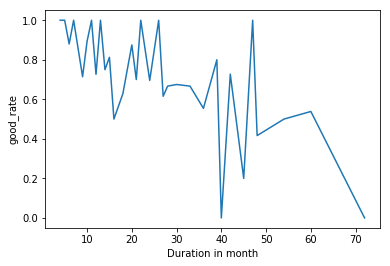

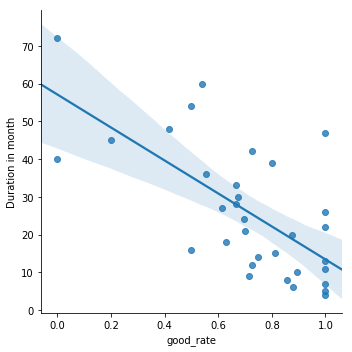

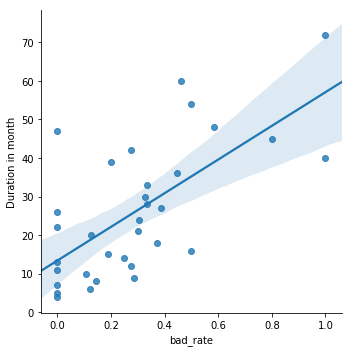

In [132]:
credit[['Duration in month','Target']]
df=pd.crosstab(index=credit['Duration in month'],columns=credit['Target']).reset_index()
df['good_rate']=df[1]/(df[1]+df[2])
df['bad_rate']=df[2]/(df[1]+df[2])

sns.lineplot(y=df['good_rate'],x=df['Duration in month'])
sns.lmplot(x='good_rate',y='Duration in month', data=df)
sns.lmplot(x='bad_rate',y='Duration in month', data=df)

In [146]:
print(credit[['Duration in month','Target']].corr(method='pearson'))
credit[['Duration in month','Target']].corr(method='pearson')

                   Duration in month    Target
Duration in month           1.000000  0.214927
Target                      0.214927  1.000000


,Duration in month,Target
Duration in month,1.000000,0.214927
Target,0.214927,1.000000


In [138]:
#correlation coefficient between Duration in month and bad_rate
print(df[['Duration in month','good_rate']].corr(method='pearson'))
df[['Duration in month','bad_rate']].corr(method='pearson')

Target             Duration in month  good_rate
Target                                         
Duration in month           1.000000  -0.672617
good_rate                  -0.672617   1.000000


Target,Duration in month,bad_rate
Target,,
Duration in month,1.000000,0.672617
bad_rate,0.672617,1.000000


In [170]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf
res=sm.OLS(credit['Duration in month'],credit['Target']).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:      Duration in month   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     2662.
Date:                Sat, 05 Oct 2019   Prob (F-statistic):          5.36e-284
Time:                        10:15:22   Log-Likelihood:                -3953.0
No. Observations:                1000   AIC:                             7908.
Df Residuals:                     999   BIC:                             7913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Target        14.9268      0.289     51.596      0.0

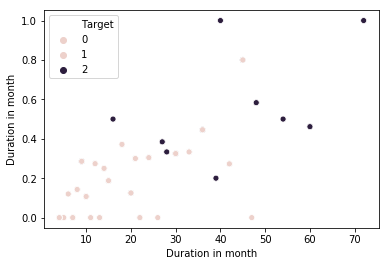

In [153]:
# pd.DataFrame(data=np.c_[credit['Duration in month'].map({x:y for x,y in zip(df['Duration in month'],df['bad_rate'])}),credit['Target']]).corr(method='spearman')
final_series=np.c_[credit['Duration in month'].map({x:y for x,y in zip(df['Duration in month'],df['bad_rate'])})]
sns.scatterplot(x=credit['Duration in month'],y=credit['Duration in month'].map({x:y for x,y in zip(df['Duration in month'],df['bad_rate'])}),hue=credit['Target'])

# Credit Amount

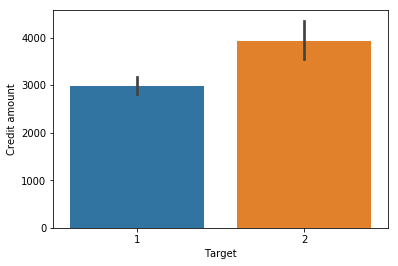

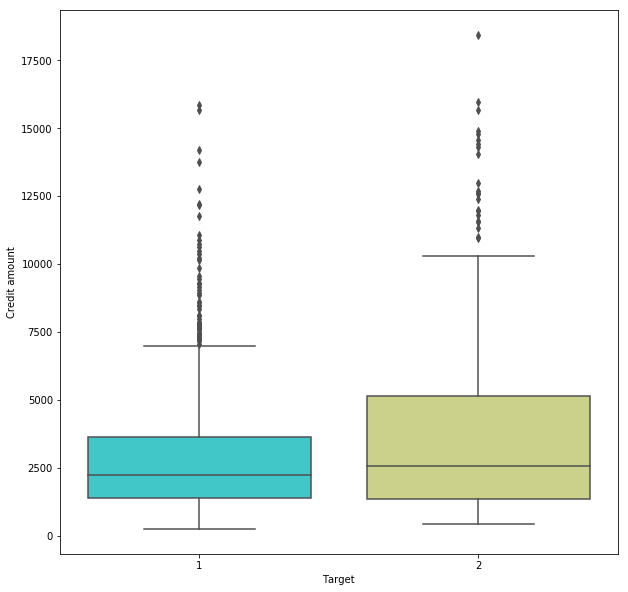

In [190]:
sns.barplot(x='Target',y='Credit amount',data=credit)#Max value is high for bad customers
plt.figure(figsize=(10,10))
sns.boxplot(x='Target',y='Credit amount',data=credit,palette='rainbow')

          0         1
0  1.000000 -0.157445
1 -0.157445  1.000000


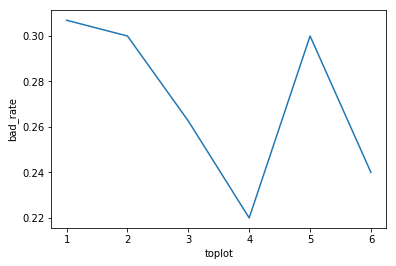

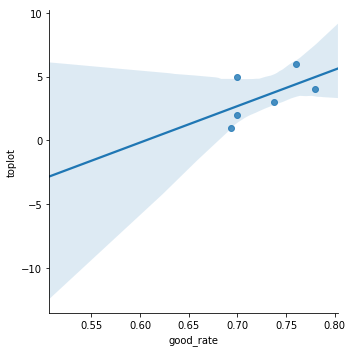

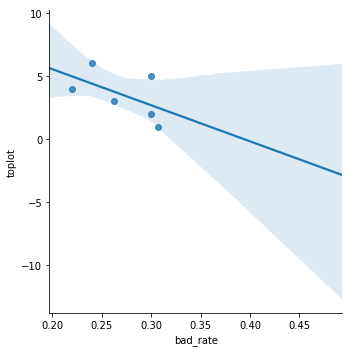

In [229]:
credit[['Credit amount']].describe()
df=pd.crosstab(pd.qcut(x=credit['Credit amount'],q=10),credit['Target']).reset_index()
df['good_rate']=df[1]/(df[1]+df[2])
df['bad_rate']=df[2]/(df[1]+df[2])
df['toplot']=pd.Series(np.arange(1,7,1))
sns.lineplot(y=df['bad_rate'],x=df['toplot'])
sns.lmplot(x='good_rate',y='toplot', data=df)
sns.lmplot(x='bad_rate',y='toplot', data=df)
print(pd.DataFrame(np.c_[credit['Credit amount'].map({x:y for x,y in zip(df['Credit amount'],df['good_rate'])}),credit['Target']]).corr())
credit[['Credit amount','Target']].corr()
#Not much change in correlatio coefs after binning based on quantiles
final_series=np.c_[final_series,credit['Credit amount'].map({x:y for x,y in zip(df['Credit amount'],df['good_rate'])})]

# Installment rate in percentage of disposable income

Correlation coefs:
                                                    Installment rate in percentage of disposable income  \
Installment rate in percentage of disposable in...                                           1.000000     
Target                                                                                       0.072404     

                                                      Target  
Installment rate in percentage of disposable in...  0.072404  
Target                                              1.000000  


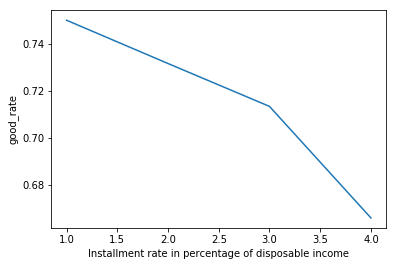

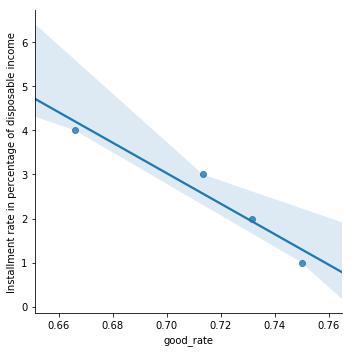

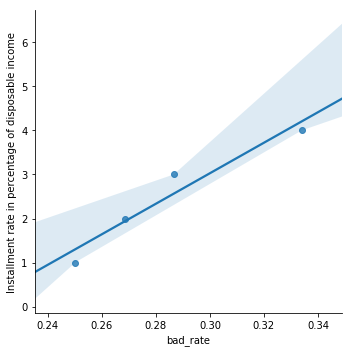

In [242]:
credit['Installment rate in percentage of disposable income'].value_counts()
credit[['Installment rate in percentage of disposable income','Target']]
df=pd.crosstab(index=credit['Installment rate in percentage of disposable income'],columns=credit['Target']).reset_index()
df['good_rate']=df[1]/(df[1]+df[2])
df['bad_rate']=df[2]/(df[1]+df[2])

sns.lineplot(y=df['good_rate'],x=df['Installment rate in percentage of disposable income'])
sns.lmplot(x='good_rate',y='Installment rate in percentage of disposable income', data=df)
sns.lmplot(x='bad_rate',y='Installment rate in percentage of disposable income', data=df)
print('Correlation coefs:')
print(credit[['Installment rate in percentage of disposable income','Target']].corr())
pd.DataFrame(np.c_[credit['Installment rate in percentage of disposable income'],credit['Installment rate in percentage of disposable income'].map({x:y for x,y in zip(df['Installment rate in percentage of disposable income'],df['bad_rate'])})]).corr()
final_series=np.c_[final_series,credit['Installment rate in percentage of disposable income'].map({x:y for x,y in zip(df['Installment rate in percentage of disposable income'],df['bad_rate'])})]



# Present residence since                                    


                         Present residence since    Target
Present residence since                 1.000000  0.002967
Target                                  0.002967  1.000000


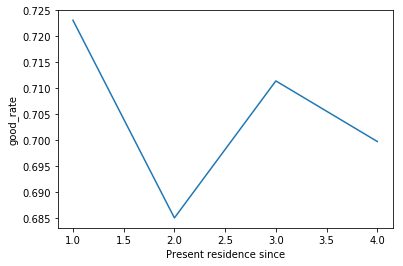

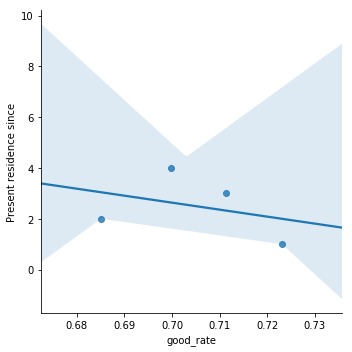

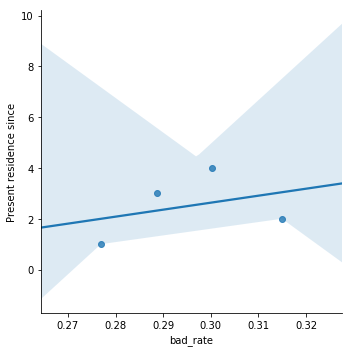

In [248]:
credit[['Present residence since','Target']]
df=pd.crosstab(index=credit['Present residence since'],columns=credit['Target']).reset_index()
df['good_rate']=df[1]/(df[1]+df[2])
df['bad_rate']=df[2]/(df[1]+df[2])

sns.lineplot(y=df['good_rate'],x=df['Present residence since'])
sns.lmplot(x='good_rate',y='Present residence since', data=df)
sns.lmplot(x='bad_rate',y='Present residence since', data=df)
print(credit[['Present residence since','Target']].corr())
pd.DataFrame(np.c_[credit['Present residence since'],credit['Present residence since'].map({x:y for x,y in zip(df['Present residence since'],df['bad_rate'])})]).corr()
final_series=np.c_[final_series,credit['Present residence since'].map({x:y for x,y in zip(df['Present residence since'],df['bad_rate'])})]


# Age in years                                               


          0         1
0  1.000000 -0.143588
1 -0.143588  1.000000
              Age in years    Target
Age in years      1.000000 -0.091127
Target           -0.091127  1.000000


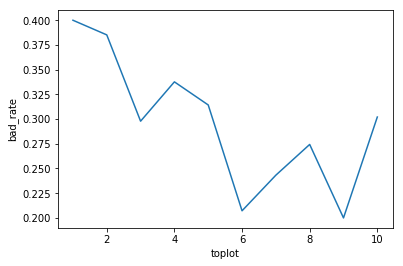

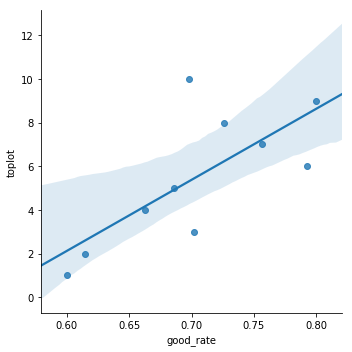

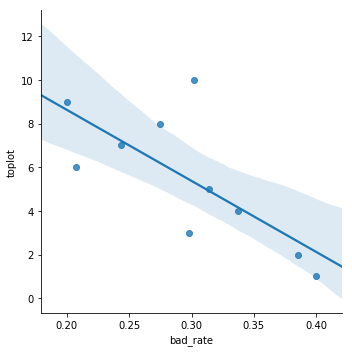

In [254]:
credit[['Age in years']].describe()
df=pd.crosstab(pd.qcut(x=credit['Age in years'],q=10),credit['Target']).reset_index()
df['good_rate']=df[1]/(df[1]+df[2])
df['bad_rate']=df[2]/(df[1]+df[2])
df['toplot']=pd.Series(np.arange(1,11,1))
sns.lineplot(y=df['bad_rate'],x=df['toplot'])
sns.lmplot(x='good_rate',y='toplot', data=df)
sns.lmplot(x='bad_rate',y='toplot', data=df)
print(pd.DataFrame(np.c_[credit['Age in years'].map({x:y for x,y in zip(df['Age in years'],df['good_rate'])}),credit['Target']]).corr())
print(credit[['Age in years','Target']].corr())
#Not much change in correlation coefs after binning based on quantiles
final_series=np.c_[final_series,credit['Age in years'].map({x:y for x,y in zip(df['Age in years'],df['good_rate'])})]

# Number of existing credits at this bank                    


                                         Number of existing credits at this bank  \
Number of existing credits at this bank                                 1.000000   
Target                                                                 -0.045732   

                                           Target  
Number of existing credits at this bank -0.045732  
Target                                   1.000000  


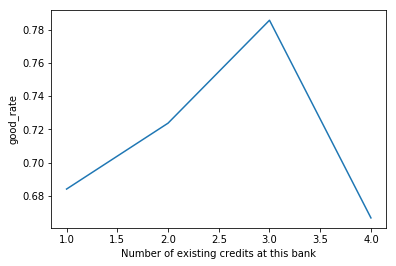

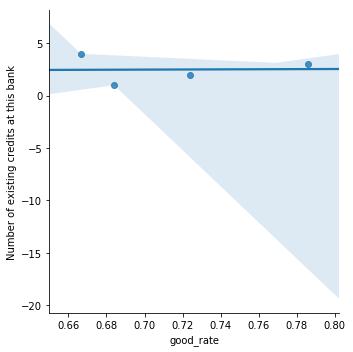

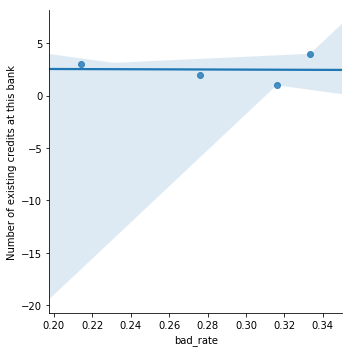

In [263]:
credit['Number of existing credits at this bank'].value_counts()
credit[['Number of existing credits at this bank','Target']]
df=pd.crosstab(index=credit['Number of existing credits at this bank'],columns=credit['Target']).reset_index()
df['good_rate']=df[1]/(df[1]+df[2])
df['bad_rate']=df[2]/(df[1]+df[2])

sns.lineplot(y=df['good_rate'],x=df['Number of existing credits at this bank'])
sns.lmplot(x='good_rate',y='Number of existing credits at this bank', data=df)
sns.lmplot(x='bad_rate',y='Number of existing credits at this bank', data=df)
print(credit[['Number of existing credits at this bank','Target']].corr())
pd.DataFrame(np.c_[credit['Number of existing credits at this bank'],credit['Number of existing credits at this bank'].map({x:y for x,y in zip(df['Number of existing credits at this bank'],df['bad_rate'])})]).corr()
final_series=np.c_[final_series,credit['Number of existing credits at this bank'].map({x:y for x,y in zip(df['Number of existing credits at this bank'],df['bad_rate'])})]


# Number of people being liable to provide maintenance for  

In [268]:
final_series=np.c_[final_series,credit['Number of people being liable to provide maintenance for']]

In [ ]:
Status of existing checking account    object
Credit history                         object
Purpose                                object
Savings account/bonds                  object
Present employment since               object
Personal status and sex                object
Other debtors / guarantors             object
Property                               object
Other installment plans                object
Housing                                object
Job                                    object
Telephone                              object
foreign worker                         object

In [376]:
# 13-categ,7=int
final_df=pd.DataFrame(data=np.c_[final_series,credit['Status of existing checking account'],credit['Credit history'],credit['Purpose'],credit['Savings account/bonds'],
     credit['Present employment since'],credit['Personal status and sex'],credit['Other debtors / guarantors'],credit['Property'],
     credit['Other installment plans'],credit['Housing'],credit['Job'],credit['Telephone'],credit['foreign worker'],credit['Target']],
            columns=['Duration in month','Credit amount','Installment rate in percentage of disposable income','Present residence since','Age in years','Number of existing credits at this bank',
                   'Number of people being liable to provide maintenance for','Status of existing checking account',
'Credit history',                     
'Purpose',                            
'Savings account/bonds',              
'Present employment since',  
'Personal status and sex',          
'Other debtors / guarantors',    
'Property',                       
'Other installment plans',            
'Housing',         
'Job',                                
'Telephone',                          
'foreign worker','Target'
])
final_df.iloc[:,categ_feat_indices]=final_df.iloc[:,categ_feat_indices].astype(object)
x=final_df.drop('Target',axis=1)
y=final_df.Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
categ_feat_indices=list(np.arange(7,20,1))
train_data=Pool(data=x_train,label=y_train,cat_features=categ_feat_indices)
model=CatBoostClassifier(learning_rate=0.1,verbose=False,iterations=132)
model.fit(train_data,eval_set=(x_test,y_test),plot=True)
print('Train Classification Report: ')
print(classification_report(y_train.map({1:0,2:1}),model.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train.map({1:0,2:1}),model.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test.map({1:0,2:1}),model.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test.map({1:0,2:1}),model.predict(x_test)))
model.score(x_test,y_test.map({1:0,2:1}))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       491
           1       0.91      0.54      0.68       209

   micro avg       0.85      0.85      0.85       700
   macro avg       0.87      0.76      0.79       700
weighted avg       0.86      0.85      0.83       700

Train confusion Matrix
Predicted  0.0  1.0
Actual             
0          480   11
1           96  113
Test Confusion Matrix
Predicted  0.0  1.0
Actual             
0          198   11
1           63   28
Test Classification Report
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       209
           1       0.72      0.31      0.43        91

   micro avg       0.75      0.75      0.75       300
   macro avg       0.74      0.63      0.64       300
weighted avg       0.75      0.75      0.72       300



0.7533333333333333

# Performing Cross Validation on Catboost Classifier

In [373]:
from catboost import Pool,cv
cv_data=Pool(x_train,y_train,cat_features=categ_feat_indices)
params = {"iterations": 500,
          "depth": 3,
          "loss_function": "Logloss",
          "verbose": False,
          "roc_file": "roc-file"}
scores=cv(cv_data,params,fold_count=3,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Using original Features

In [417]:
y=german_df.Class
x=german_df.drop('Class',axis=1)
print(x.shape,y.shape)
y=y.map({'Good':0,'Bad':1})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
train_data=Pool(data=x_train,label=y_train)
model=CatBoostClassifier(learning_rate=0.1,verbose=False)
model.fit(train_data,eval_set=(x_test,y_test),plot=True)
print('Train Classification Report: ')
print(classification_report(y_train,model.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,model.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,model.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,model.predict(x_test)))
model.score(x_test,y_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)


0.6862873968137125

# Using original numerical features along with Categorical features with catboost handling

In [393]:

df=credit[['Duration in month','Credit amount','Installment rate in percentage of disposable income','Present residence since','Age in years','Number of existing credits at this bank',
                   'Number of people being liable to provide maintenance for','Status of existing checking account',
'Credit history',                     
'Purpose',                            
'Savings account/bonds',              
'Present employment since',  
'Personal status and sex',          
'Other debtors / guarantors',    
'Property',                       
'Other installment plans',            
'Housing',         
'Job',                                
'Telephone',                          
'foreign worker','Target']]
x=df.drop('Target',axis=1)
y=df.Target
print(x.shape,y.shape)
y=y.map({1:0,2:1})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
train_data=Pool(data=x_train,label=y_train,cat_features=categ_feat_indices)
model=CatBoostClassifier(learning_rate=0.01,verbose=False)
model.fit(train_data,eval_set=(x_test,y_test),plot=True)
print('Train Classification Report: ')
print(classification_report(y_train,model.predict(x_train)))
print('Train confusion Matrix')
print(pd.crosstab(y_train,model.predict(x_train),rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,model.predict(x_test),colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,model.predict(x_test)))
model.score(x_test,y_test)

(1000, 20) (1000,)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       491
           1       0.87      0.53      0.65       209

   micro avg       0.83      0.83      0.83       700
   macro avg       0.85      0.75      0.77       700
weighted avg       0.84      0.83      0.82       700

Train confusion Matrix
Predicted  0.0  1.0
Actual             
0          474   17
1           99  110
Test Confusion Matrix
Predicted  0.0  1.0
Actual             
0          194   15
1           59   32
Test Classification Report
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       209
           1       0.68      0.35      0.46        91

   micro avg       0.75      0.75      0.75       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.74      0.75      0.73       300



0.7533333333333333

In [397]:
result_df

,Default Params test_score,test_scores,f1-score,FP,FN,AUC
RF,0.750000,0.713333,0.0,0.0,0.0,0.0
XGB,0.770000,0.770000,0.0,0.0,0.0,0.0
CatBoost,0.786667,0.783333,0.0,0.0,0.0,0.0
LightGBM,0.000000,0.000000,0.0,0.0,0.0,0.0


# Light GBM

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params,train_set=d_train)
pred=pd.Series(clf.predict(x_train)>0.3)
pred_test=pd.Series(clf.predict(x_test)>0.3)
print('Train Classification Report: ')
print(classification_report(y_train,pred))
print('Train confusion Matrix')
print(pd.crosstab(y_train,pred,rownames=['Actual'],colnames=['Predicted']))
print('Test Confusion Matrix')
print(pd.crosstab(y_test,pred_test,colnames=['Predicted'],rownames=['Actual']))
print('Test Classification Report')
print(classification_report(y_test,pred_test))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       491
           1       0.52      0.79      0.62       209

   micro avg       0.72      0.72      0.72       700
   macro avg       0.70      0.74      0.70       700
weighted avg       0.77      0.72      0.73       700

Train confusion Matrix
Predicted  False  True 
Actual                 
0            190    152
1             72     73
Test Confusion Matrix
Predicted  False  True 
Actual                 
0             35     34
1             18      5
Test Classification Report
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       209
           1       0.53      0.76      0.62        91

   micro avg       0.72      0.72      0.72       300
   macro avg       0.70      0.73      0.70       300
weighted avg       0.77      0.72      0.73       300



0.7307955202692045

In [40]:
import pickle 
file=open('Ensemble_metrics.pkl','rb')
pickle.load(file)

,Default Params test_score,test_scores,f1-score_testset,test_set_FP,test_set_FN,test_set_AUC
RF,0.750000,0.713333,"[0.84,0.42]",13.0,63.0,0.601700
XGB,0.770000,0.770000,"[0.83,0.38]",12.0,67.0,0.603160
CatBoost,0.786667,0.783333,"[0.84,0.46]",15.0,59.0,0.686287
LightGBM,0.000000,0.000000,0,0.0,0.0,0.000000
